In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_cpu_times = [1805273,1813492,1810017,1811160,1808155,1811295,1809109,1810459,1807852,1810617,1812087,1809282,1810507,1809272,1804307,1807797,1811466,1808108,1808976,1810535]
n_diskr_times = [5328,2129,2158,2247,2103,2150,2175,2201,2180,2167,2154,2128,2164,2205,2111,2172,2179,2093,2183,2114] # refazer, cache pode ter mudado os resultados
n_diskw_times = [3185,2892,2915,2910,2928,2926,2859,2910,2934,2847,2907,2910,2889,2947,2918,2960,2853,2890,2924,2913]
n_mem_times = [20992,21008,20991,21041,20982,20896,20906,20969,21017,20878,20968,21273,21047,20999,21021,20994,20929,21046,20940,20983]
n_rec_times = [133611,133549,134672,133351,134291,133903,133851,133595,134032,133634,134111,133447,133346,132659,134262,134093,134054,133555,133488,133804]

e_cpu_times = [1814826,1808243,1811993,1810891,1809468,1808701,1809086,1804469,1809707,1813704,1809192,1809347,1808363,1812274,1810817,1811206,1808514,1810205,1811166,1809078]
e_diskr_times = [39546,38741,38162,38896,37709,37885,37954,38202,37729,37968,37487,37813,37685,38046,37541,37946,38422,37384,37581,37752]
e_diskw_times = [5192,5280,5176,5175,5180,5304,5264,5284,5225,5275,5275,5291,5195,5246,5223,5229,5328,5166,5311,5245]
e_mem_times = [2164753,2147271,2143604,2127381,2129937,2128145,2129820,2130767,2114635,2140648,2132306,2141612,2133686,2128813,2127447,2135094,2131951,2118776,2136144,2129765]
e_rec_times = [168149,168664,169551,169036,168612,169817,168498,169156,168665,168641,168781,169142,168708,168691,168555,168219,169106,168562,168537,168882]

In [3]:
np.mean(e_cpu_times) / np.mean(n_cpu_times)

1.0003173272797619

In [4]:
np.mean(e_diskr_times) / np.mean(n_diskr_times)

16.409853045898878

In [5]:
np.mean(e_diskw_times) / np.mean(n_diskw_times)

1.7950938939007481

In [6]:
np.mean(e_mem_times) / np.mean(n_mem_times)

101.63035867390683

In [7]:
np.mean(e_rec_times) / np.mean(n_rec_times)

1.2619003120388383

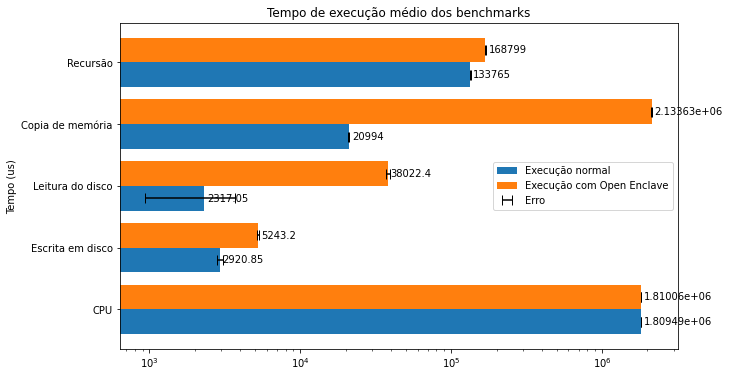

In [13]:
labels = ["CPU", "Escrita em disco", "Leitura do disco", "Copia de memória", "Recursão"]
normal_means = [
    np.mean(n_cpu_times),
    np.mean(n_diskw_times),
    np.mean(n_diskr_times),
    np.mean(n_mem_times),
    np.mean(n_rec_times)
]
normal_err = [
    2*np.std(n_cpu_times),
    2*np.std(n_diskw_times),
    2*np.std(n_diskr_times),
    2*np.std(n_mem_times),
    2*np.std(n_rec_times)
]
enclave_means = [
    np.mean(e_cpu_times),
    np.mean(e_diskw_times),
    np.mean(e_diskr_times),
    np.mean(e_mem_times),
    np.mean(e_rec_times)
]
enclave_err = [
    2*np.std(e_cpu_times),
    2*np.std(e_diskw_times),
    2*np.std(e_diskr_times),
    2*np.std(e_mem_times),
    2*np.std(e_rec_times)
]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, normal_means, width, label='Execução normal')
rects2 = ax.barh(x + width/2, enclave_means, width, label='Execução com Open Enclave')

ax.errorbar(normal_means, x - width/2, xerr=normal_err, color='black', capsize=5, fmt=' ', label='Erro')
ax.errorbar(enclave_means, x + width/2, xerr=enclave_err, color='black', capsize=5, fmt=' ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tempo (us)')
ax.set_title('Tempo de execução médio dos benchmarks')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.autoscale(True)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.xscale('log')
plt.show()

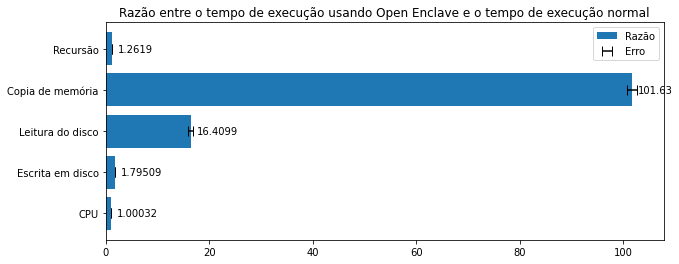

In [18]:
means = np.divide(enclave_means, normal_means)

fig, ax = plt.subplots()
# means = np.round(means)
bars = ax.barh(x, means, width*2, label='Razão')

enclave_err_part = np.multiply(np.divide(np.ones(len(enclave_means)), normal_means), enclave_err)
enclave_err_part = np.multiply(enclave_err_part, enclave_err_part)
normal_err_part = np.multiply(np.divide(normal_means, np.multiply(enclave_means, enclave_means)) , normal_err)
normal_err_part = np.multiply(normal_err_part, normal_err_part)
ratio_err = np.sqrt(np.add(enclave_err_part, normal_err_part))

ax.errorbar(means, x, xerr=ratio_err, color='black', capsize=5, fmt=' ', label='Erro')

fig.set_figwidth(10)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Razão entre o tempo de execução usando Open Enclave e o tempo de execução normal')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.bar_label(bars, padding=6)

ax.legend()
plt.show()